In [1]:
!pip install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [21]:
transform = transforms.Compose([
                                transforms.Resize((28, 28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5))
                              ])

In [13]:
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size = 100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size = 100, shuffle=False)

In [5]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,)) + np.array(0.5,)
  image = image.clip(0, 1)
  return image

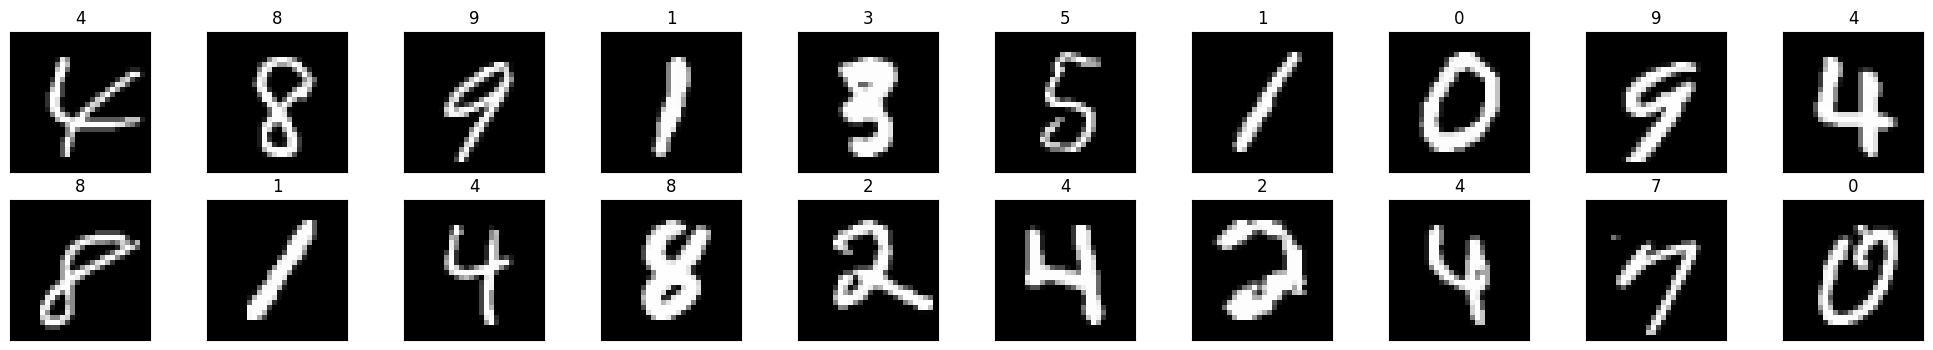

In [6]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks= [])
  plt.imshow(im_convert(images[idx]), cmap='gray')
  ax.set_title(labels[idx].item())

In [7]:
class Classifier(nn.Module):
  def __init__(self, n_input, H1, H2, n_out):
    super().__init__()
    self.linear1 = nn.Linear(n_input, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, n_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [8]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [15]:
epochs = 12
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float() / len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    epoch_loss = val_running_loss/len(validation_loader)
    epoch_acc = val_running_corrects.float() / len(validation_loader)
    val_running_loss_history.append(epoch_loss)
    val_running_corrects_history.append(epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('val loss: {:.4f}, val acc: {:.4f}'.format(epoch_loss, epoch_acc.item()))

epoch : 1
training loss: 0.1352, acc: 96.1217
val loss: 0.1352, val acc: 96.1217
epoch : 2
training loss: 0.1209, acc: 96.5267
val loss: 0.1209, val acc: 96.5267
epoch : 3
training loss: 0.1152, acc: 96.6400
val loss: 0.1152, val acc: 96.6400
epoch : 4
training loss: 0.1075, acc: 96.9867
val loss: 0.1075, val acc: 96.9867
epoch : 5
training loss: 0.1071, acc: 96.9250
val loss: 0.1071, val acc: 96.9250
epoch : 6
training loss: 0.0973, acc: 97.1867
val loss: 0.0973, val acc: 97.1867
epoch : 7
training loss: 0.0953, acc: 97.2817
val loss: 0.0953, val acc: 97.2817
epoch : 8
training loss: 0.0876, acc: 97.4583
val loss: 0.0876, val acc: 97.4583
epoch : 9
training loss: 0.0857, acc: 97.5550
val loss: 0.0857, val acc: 97.5550
epoch : 10
training loss: 0.0813, acc: 97.7117
val loss: 0.0813, val acc: 97.7117
epoch : 11
training loss: 0.0775, acc: 97.7717
val loss: 0.0775, val acc: 97.7717
epoch : 12
training loss: 0.0822, acc: 97.6217
val loss: 0.0822, val acc: 97.6217


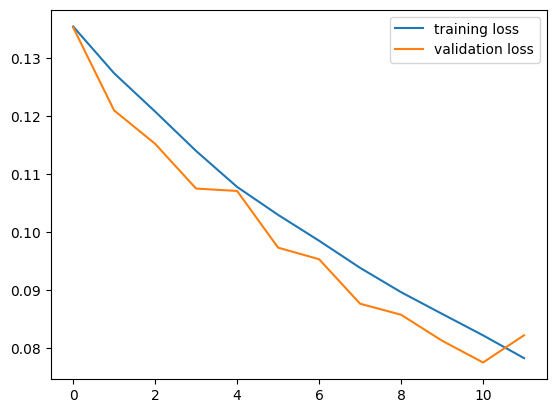

In [17]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

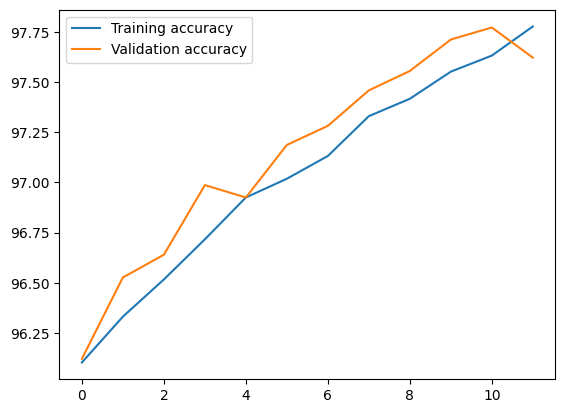

In [18]:
plt.plot(running_corrects_history, label='Training accuracy')
plt.plot(val_running_corrects_history, label='Validation accuracy')
plt.legend()

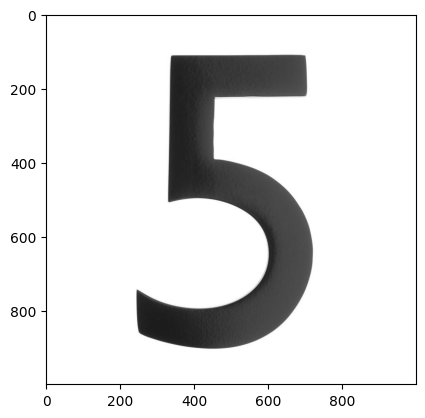

In [31]:
import requests
import PIL.ImageOps
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

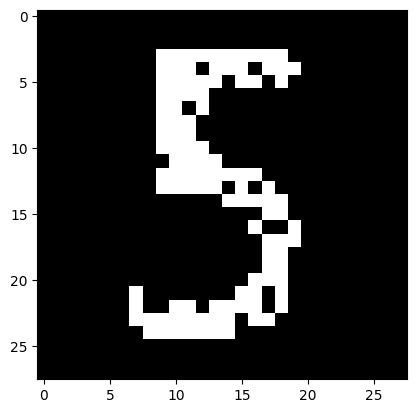

In [32]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img), cmap='gray')

In [33]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5
